In [6]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, UpSampling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
# Змінюємо форму зображень на 32x32 та нормалізуємо значення пікселів
train_images = np.expand_dims(train_images, axis=-1)  # Додаємо один канал для чорно-білих зображень
test_images = np.expand_dims(test_images, axis=-1)

train_images = np.concatenate([train_images] * 3, axis=-1)  # Копіюємо зображення тричі для каналів RGB
test_images = np.concatenate([test_images] * 3, axis=-1)

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Збільшення зображень до розміру 32x32
train_images = np.array([resize(x, [32, 32]) for x in train_images])
test_images = np.array([resize(x, [32, 32]) for x in test_images])

In [9]:
# Завантаження передньовивченої моделі VGG16
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Заморожуємо згорткові шари базової моделі
vgg_base.trainable = False

# Побудова моделі
model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.5017 - loss: 1.4517 - val_accuracy: 0.7887 - val_loss: 0.6215
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.7654 - loss: 0.6630 - val_accuracy: 0.8157 - val_loss: 0.5261
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.8016 - loss: 0.5626 - val_accuracy: 0.8278 - val_loss: 0.4842
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.8145 - loss: 0.5199 - val_accuracy: 0.8377 - val_loss: 0.4552
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.8285 - loss: 0.4779 - val_accuracy: 0.8382 - val_loss: 0.4434
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.8347 - loss: 0.4614 - val_accuracy: 0.8455 - val_loss: 0.4277
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.8395 - loss: 0.4466 - val_accuracy: 0.8480 - val_loss: 0.4157
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.8436 - loss: 0.4333 - val_accuracy: 0.8530 - v

In [11]:
# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.8653 - loss: 0.3724
Test accuracy: 0.862500011920929


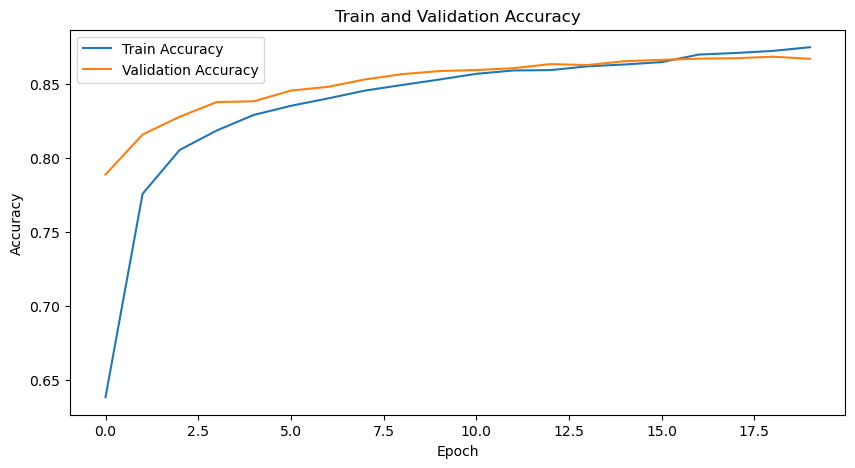

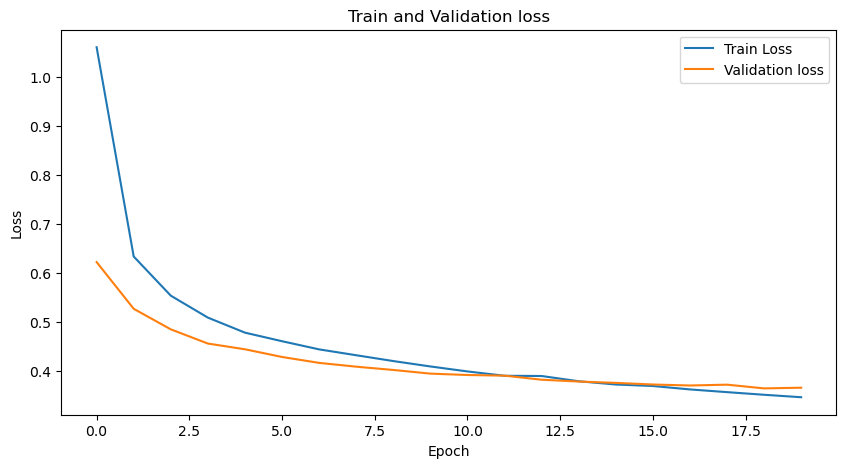

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Train and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Висновок

Згорткова мережа на основі VGG16 може бути більш ефективною для завдань обробки зображень завдяки попередньо навченій моделі, але може бути складнішою для розуміння та конфігурування. Вимагає більше часу для навчання моделі та більше ресурсів. Не дала покращення результатів навчання модеі порівнянно з багатошаровою моделлю.